## Coffee Global Analysis
This notebook explores the global coffee industry with a focus on production, trade, and consumption trends. By analyzing data on green coffee production, harvested areas, imports, exports, and consumption patterns, this project aims to uncover interesting insights and phenomena that shape the coffee market worldwide to better understand the dynamics of this essential commodity.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

plt.style.use('ggplot')
pd.options.display.float_format = '{:.2f}'.format 

In [2]:
df_prod = pd.read_csv("./raw_data/production-quantity_raw.csv")
df_prod.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,24,Angola,5312,Area harvested,1610,"Coffee, green",1961,1961,ha,350000.00,A,Official figure,NaN
1,QCL,Crops and livestock products,24,Angola,5510,Production,1610,"Coffee, green",1961,1961,t,168600.00,A,Official figure,NaN
2,QCL,Crops and livestock products,24,Angola,5312,Area harvested,1610,"Coffee, green",1962,1962,ha,500000.00,A,Official figure,NaN
3,QCL,Crops and livestock products,24,Angola,5510,Production,1610,"Coffee, green",1962,1962,t,185000.00,A,Official figure,NaN
4,QCL,Crops and livestock products,24,Angola,5312,Area harvested,1610,"Coffee, green",1963,1963,ha,500000.00,E,Estimated value,NaN


### First Data Understandings - (PRODUCTION QUANTITY & AREA HARVESTED)

In [3]:
df_prod.shape

(10556, 15)

In [4]:
df_prod.dtypes

Domain Code          object
Domain               object
Area Code (M49)       int64
Area                 object
Element Code          int64
Element              object
Item Code (CPC)       int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
Note                 object
dtype: object

In [5]:
df_prod.describe()

,Area Code (M49),Element Code,Item Code (CPC),Year Code,Year,Value
count,10556.00,10556.00,10556.00,10556.00,10556.00,10188.00
mean,426.64,5411.32,1610.00,1991.81,1991.81,103928.82
std,245.77,99.00,0.00,18.14,18.14,298442.80
min,24.00,5312.00,1610.00,1961.00,1961.00,0.00
25%,192.00,5312.00,1610.00,1976.00,1976.00,540.00
50%,404.00,5510.00,1610.00,1992.00,1992.00,10000.00
75%,630.00,5510.00,1610.00,2007.00,2007.00,78043.75
max,894.00,5510.00,1610.00,2023.00,2023.00,4462657.00


In [6]:
#Columns to keep: Area Code (M49), Area, Element (make own columns for each element), Year, Unit, Value
def drop_cols(df, cols_arr):
    return df.drop(columns=cols_arr)

df_prod = drop_cols(df_prod, ['Domain Code', 'Domain', 'Element Code', 'Item Code (CPC)', 'Year Code', 'Flag', 'Flag Description', 'Note'])

In [7]:
df_prod.head()

,Area Code (M49),Area,Element,Item,Year,Unit,Value
0,24,Angola,Area harvested,"Coffee, green",1961,ha,350000.00
1,24,Angola,Production,"Coffee, green",1961,t,168600.00
2,24,Angola,Area harvested,"Coffee, green",1962,ha,500000.00
3,24,Angola,Production,"Coffee, green",1962,t,185000.00
4,24,Angola,Area harvested,"Coffee, green",1963,ha,500000.00


In [8]:
#rearrange dataframe to have elements as own columns
def pivot_handler(df, index, cols, val):
    df = df.pivot_table(
        index=index,
        columns=cols,
        values=val
    ).reset_index() 
    df.columns.name = None 
    return df

df_prod = pivot_handler(df_prod, ['Area Code (M49)', 'Area', 'Year'], 'Element', 'Value')

In [9]:
#renaming columns
def rename_cols(df, cols):
    return df.rename(columns=cols)

df_prod = rename_cols(df_prod, {"Area Code (M49)":"Area_code", "Area harvested":"Area_harvested_hectar", "Production":"Production_quantity_tonnes"})

In [10]:
df_prod.head()

,Area_code,Area,Year,Area_harvested_hectar,Production_quantity_tonnes
0,24,Angola,1961,350000.00,168600.00
1,24,Angola,1962,500000.00,185000.00
2,24,Angola,1963,500000.00,168300.00
3,24,Angola,1964,500000.00,198200.00
4,24,Angola,1965,500000.00,205000.00


In [11]:
#save version 2 of production df
df_prod.to_csv('production-quantity_pivoted.csv', index=False)

In [12]:
#get top countries with high green coffee production quantity on average
top_producer = df_prod.groupby("Area")[["Production_quantity_tonnes"]].mean().sort_values(by=["Production_quantity_tonnes"], ascending=False).head(8)

In [13]:
top_producer.head(15)

,Production_quantity_tonnes
Area,
Brazil,1912080.68
Colombia,655110.90
Viet Nam,535367.43
Indonesia,435206.09
Ethiopia,320333.47
Mexico,250006.22
Guatemala,199471.56
Côte d'Ivoire,198883.18


In [14]:
#NULL Values - only Spain: Area_harvested_hectar affected
#leave as is for transparency
df_prod.isna().sum()

Area_code                      0
Area                           0
Year                           0
Area_harvested_hectar         34
Production_quantity_tonnes     0
dtype: int64

In [15]:
#formatter for million numbers
def formatter(x, pos):
    """Formatiert eine Zahl in Millionen mit zwei Nachkommastellen."""
    return f'{x / 1_000_000:.2f}'

### First Plots - (PRODUCTION QUANTITY & AREA HARVESTED)

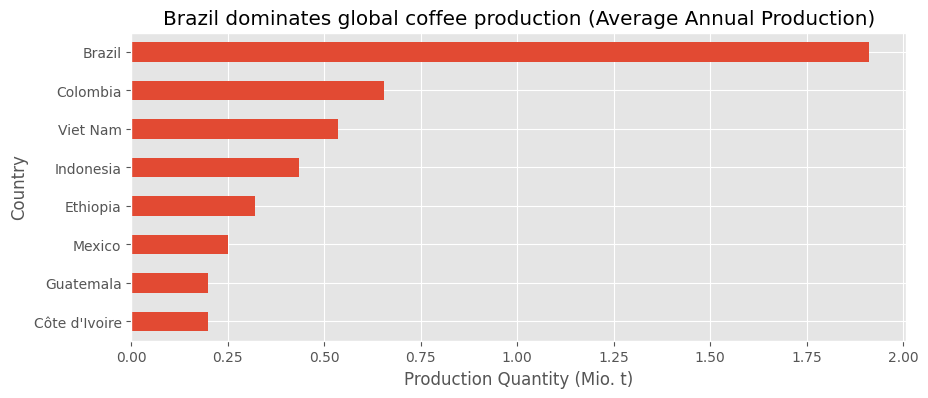

In [16]:
#plot top producing countries
ax = top_producer.plot(kind="barh", title="Brazil dominates global coffee production (Average Annual Production)", 
                       legend=False, figsize=(10,4))
plt.gca().invert_yaxis()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter))
ax.set_ylabel("Country")
ax.set_xlabel("Production Quantity (Mio. t)")
plt.show()

In [17]:
top_harvester = df_prod.groupby("Area")[["Area_harvested_hectar"]].mean().sort_values(by=["Area_harvested_hectar"], ascending=False).head(8)

In [18]:
top_harvester

,Area_harvested_hectar
Area,
Brazil,2403731.95
Colombia,857889.21
Indonesia,796926.02
Côte d'Ivoire,771125.95
Mexico,576365.46
Ethiopia PDR,473115.41
Ethiopia,465562.13
Uganda,307538.19


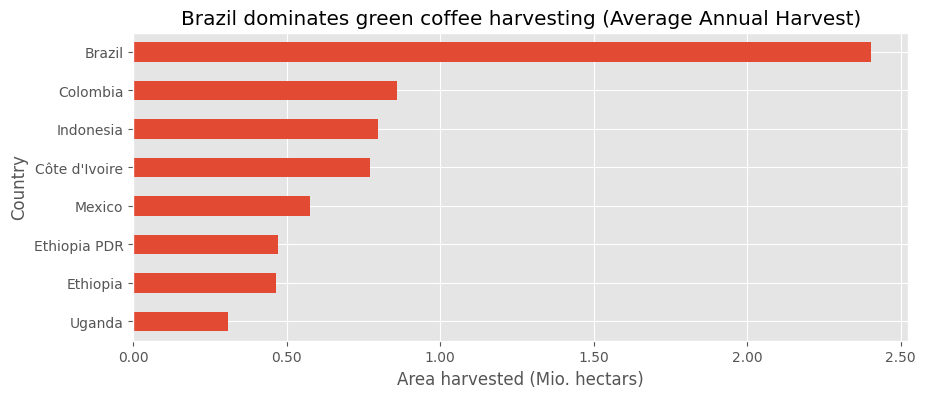

In [19]:
#plot top harvester countries
ax = top_harvester.plot(kind="barh", title="Brazil dominates green coffee harvesting (Average Annual Harvest)", 
                       legend=False, figsize=(10,4))
plt.gca().invert_yaxis()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter))
ax.set_ylabel("Country")
ax.set_xlabel("Area harvested (Mio. hectars)")
plt.show()

In [93]:
top3_prod = df_prod.groupby(["Area", "Year"])[["Production_quantity_tonnes"]].mean().sort_values(by=["Production_quantity_tonnes"])

In [94]:
top3_prod = top3_prod.loc[["Brazil", "Colombia", "Viet Nam"]].reset_index()

In [95]:
top3_prod

,Area,Year,Production_quantity_tonnes
0,Brazil,1976,375985.00
1,Brazil,1970,754800.00
2,Brazil,1973,872897.00
3,Brazil,1995,930135.00
4,Brazil,1982,957931.00
...,...,...,...
184,Viet Nam,2019,1686765.17
185,Viet Nam,2020,1763476.04
186,Viet Nam,2021,1845032.98
187,Viet Nam,2022,1953990.16


In [96]:
top3_prod = pivot_handler(top3_prod, ['Year'], 'Area', 'Production_quantity_tonnes')

In [98]:
top3_prod

,Year,Brazil,Colombia,Viet Nam
0,1961,2228704.00,450000.00,4100.00
1,1962,2190303.00,482100.00,4020.00
2,1963,1650527.00,450000.00,4500.00
3,1964,1042013.00,468000.00,5500.00
4,1965,2294047.00,492000.00,7500.00
...,...,...,...,...
58,2019,3011745.00,885120.00,1686765.17
59,2020,3705719.00,833400.00,1763476.04
60,2021,2985581.00,560340.00,1845032.98
61,2022,3179176.00,665015.95,1953990.16


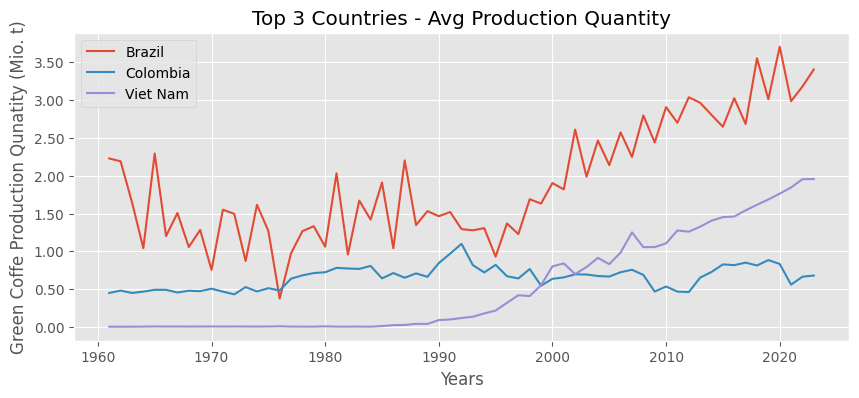

In [111]:
ax = top3_prod.plot(kind="line", x="Year", title="Top 3 Countries - Avg Production Quantity", figsize=(10,4))
ax.set_xlabel("Years")
ax.set_ylabel("Green Coffe Production Qunatity (Mio. t)")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.show()

### First Data Understandings - (TRADE)

In [20]:
df_trade = pd.read_csv("./raw_data/trade_raw.csv")

In [21]:
df_trade.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5610,Import quantity,1610,"Coffee, green",1961,1961,t,0.00,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import value,1610,"Coffee, green",1961,1961,1000 USD,0.00,A,Official figure,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5610,Import quantity,1610,"Coffee, green",1962,1962,t,0.00,A,Official figure,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import value,1610,"Coffee, green",1962,1962,1000 USD,0.00,A,Official figure,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5610,Import quantity,1610,"Coffee, green",1963,1963,t,0.00,A,Official figure,NaN


In [22]:
df_trade.shape

(39534, 15)

In [23]:
df_trade.dtypes

Domain Code          object
Domain               object
Area Code (M49)       int64
Area                 object
Element Code          int64
Element              object
Item Code (CPC)       int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
Note                 object
dtype: object

In [24]:
#Columns to keep: Area Code (M49), Area, Element (make own columns for each element), Year, Unit, Value
df_trade = drop_cols(df_trade, ['Domain Code', 'Domain', 'Element Code', 'Item Code (CPC)', 'Year Code', 'Flag', 'Flag Description', 'Note'])

In [25]:
df_trade

,Area Code (M49),Area,Element,Item,Year,Unit,Value
0,4,Afghanistan,Import quantity,"Coffee, green",1961,t,0.00
1,4,Afghanistan,Import value,"Coffee, green",1961,1000 USD,0.00
2,4,Afghanistan,Import quantity,"Coffee, green",1962,t,0.00
3,4,Afghanistan,Import value,"Coffee, green",1962,1000 USD,0.00
4,4,Afghanistan,Import quantity,"Coffee, green",1963,t,0.00
...,...,...,...,...,...,...,...
39529,716,Zimbabwe,Export value,"Coffee, green",2022,1000 USD,365.00
39530,716,Zimbabwe,Import quantity,"Coffee, green",2023,t,26.16
39531,716,Zimbabwe,Import value,"Coffee, green",2023,1000 USD,23.00
39532,716,Zimbabwe,Export quantity,"Coffee, green",2023,t,43.70


In [26]:
#rearrange dataframe to have elements as own columns
df_trade = pivot_handler(df_trade, ['Area Code (M49)', 'Area', 'Year'], 'Element', 'Value')

In [27]:
df_trade = rename_cols(df_trade, {"Area Code (M49)":"Area_code", "Export quantity":"export_quantity_tonnes", "Export value":"export_value_1000_usd", "Import quantity":"import_quantity_tonnes", "Import value":"import_value_1000_usd"})

In [28]:
df_trade

,Area_code,Area,Year,export_quantity_tonnes,export_value_1000_usd,import_quantity_tonnes,import_value_1000_usd
0,4,Afghanistan,1961,NaN,NaN,0.00,0.00
1,4,Afghanistan,1962,NaN,NaN,0.00,0.00
2,4,Afghanistan,1963,NaN,NaN,0.00,0.00
3,4,Afghanistan,1964,NaN,NaN,0.00,0.00
4,4,Afghanistan,1965,NaN,NaN,0.00,0.00
...,...,...,...,...,...,...,...
11121,894,Zambia,2019,1213.58,3236.00,21.96,123.00
11122,894,Zambia,2020,2100.69,6701.00,43.80,183.00
11123,894,Zambia,2021,3766.61,13978.00,31.90,163.00
11124,894,Zambia,2022,4933.48,23717.00,23.50,183.00


In [29]:
#NULL values
df_trade.isna().sum()

Area_code                    0
Area                         0
Year                         0
export_quantity_tonnes    2051
export_value_1000_usd     2012
import_quantity_tonnes     488
import_value_1000_usd      419
dtype: int64

In [30]:
df_trade.loc[df_trade["export_quantity_tonnes"].isnull()]

,Area_code,Area,Year,export_quantity_tonnes,export_value_1000_usd,import_quantity_tonnes,import_value_1000_usd
0,4,Afghanistan,1961,NaN,NaN,0.00,0.00
1,4,Afghanistan,1962,NaN,NaN,0.00,0.00
2,4,Afghanistan,1963,NaN,NaN,0.00,0.00
3,4,Afghanistan,1964,NaN,NaN,0.00,0.00
4,4,Afghanistan,1965,NaN,NaN,0.00,0.00
...,...,...,...,...,...,...,...
10954,882,Samoa,2023,NaN,NaN,6.23,54.00
11049,891,Serbia and Montenegro,1992,NaN,0.00,26257.00,39466.00
11050,891,Serbia and Montenegro,1993,NaN,0.00,0.00,0.00
11051,891,Serbia and Montenegro,1994,NaN,0.00,1400.00,4000.00


In [31]:
df_trade.isna().mean() * 100

Area_code                 0.00
Area                      0.00
Year                      0.00
export_quantity_tonnes   18.43
export_value_1000_usd    18.08
import_quantity_tonnes    4.39
import_value_1000_usd     3.77
dtype: float64

In [32]:
missing_trade_vals = df_trade[df_trade['export_quantity_tonnes'].isna()].groupby('Area')['Year'].count().sort_values(ascending=False)

In [33]:
# remove countries with missing or non-existent trade values
missing_trade_vals

Area
Mauritania                    63
Seychelles                    63
Kiribati                      62
Faroe Islands                 62
Maldives                      62
                              ..
Iran (Islamic Republic of)     1
Estonia                        1
Latvia                         1
Sao Tome and Principe          1
Palestine                      1
Name: Year, Length: 97, dtype: int64